#**Lets Grow More**

Author : **Harshit Sharma**

Language : **Python**

IDE : **Google Colab Notebook**

Level : **Beginner**

Task : **1 (Iris Flowers Classification ML Project)**

Github : **https://github.com/harshitsharma1502/LGMVIP-DataScience**

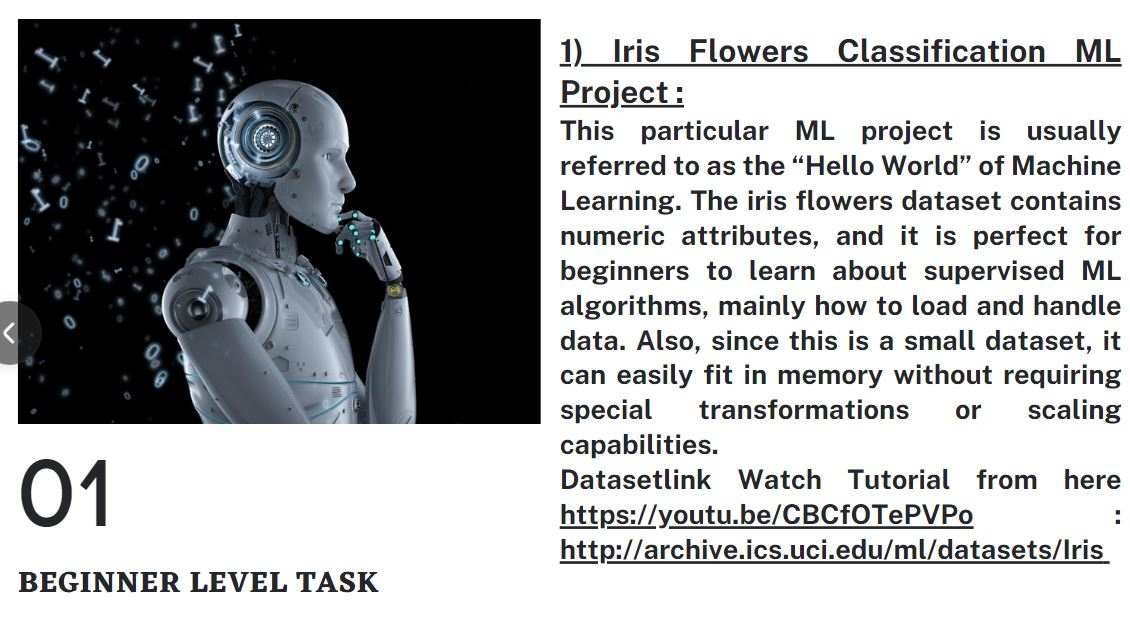

##**Step 1-Load the data:**

In [ ]:
#Import Packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [ ]:
columns = ['Sepal length','Sepal width','Petal length','Petal width','Class_labels']
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/iris.data',names=columns)

In [ ]:
df.head()

,Sepal length,Sepal width,Petal length,Petal width,Class_labels
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


##**Step 2-** **Analyze and visualize the dataset:**

In [ ]:
# Some basic statistical analysis about the data.
df.describe()

,Sepal length,Sepal width,Petal length,Petal width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


**⚫ From this description, we can see all the descriptions about the data, like average length and width, minimum value, maximum value, the 25%, 50%, and 75% distribution value, etc.**

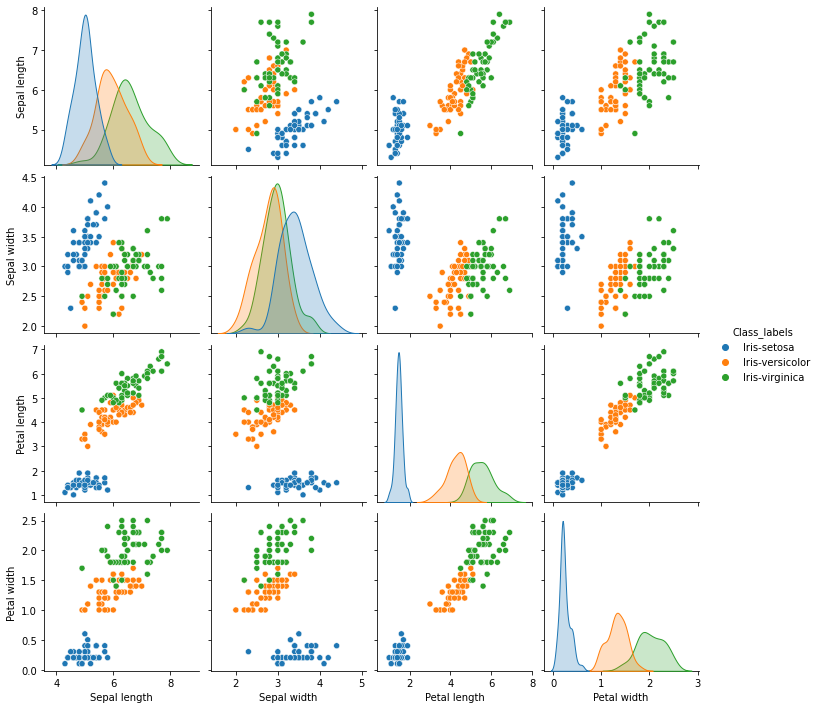

In [ ]:
# Visualize the whole dataset.
sns.pairplot(df, hue='Class_labels');



*   **From the above visualization, we can say that iris-setosa is well seperated from the other two flowers.**
*   **Iris verginica is the longest flower and iris versicolor is the shortest.** 

▶ **Now lets plot the average of each feature of each class.**

In [ ]:
# Seperate features and target.
data = df.values
X = data[:,0:4]
Y = data[:,4]

**Here we seperated the features from the target value.**

In [ ]:
# Calculate average of each features for all classes.
Y_Data = np.array([np.average(X[:, i][Y==j].astype('float32')) for i in range (X.shape[1])
  for j in (np.unique(Y))])
Y_Data_reshaped = Y_Data.reshape(4, 3)
Y_Data_reshaped = np.swapaxes(Y_Data_reshaped, 0, 1)
X_axis = np.arange(len(columns)-1)
width = 0.25

*   Here we used two for loops inside a list. This is known as list comprehension.
*   List comprehension helps to reduce the number of lines of code.
*   The Y_Data is a 1D array, but we have 4 features for every 3 classes. So we reshaped Y_Data to a (4, 3) shaped array.
*   Then we change the axis of the reshaped matrix.

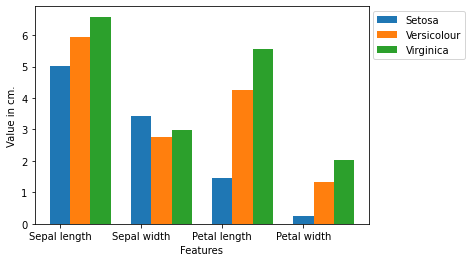

In [ ]:
# Plot the average.
plt.bar(X_axis, Y_Data_reshaped[0], width, label = 'Setosa')
plt.bar(X_axis+width, Y_Data_reshaped[1], width, label = 'Versicolour')
plt.bar(X_axis+width*2, Y_Data_reshaped[2], width, label = 'Virginica')
plt.xticks(X_axis, columns[:4])
plt.xlabel("Features")
plt.ylabel("Value in cm.")
plt.legend(bbox_to_anchor=(1.3,1))
plt.show();

◾ **Here we can clearly see the verginica is the longest and setosa is the shortest flower.**

##**Step 3- Model Training:**

In [ ]:
# Split the data into Train and test Dataset.
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2)

In [ ]:
# Support vector machine algorithm.
svn = SVC()
svn.fit(X_train, y_train)

SVC()

##**Step 4- Model Evaluation:**

In [ ]:
# Predict from the test dataset.
predictions = svn.predict(X_test)

# Calculate the accuracy.
accuracy_score(y_test, predictions)

0.9

**The accuracy score is 90%.**

##**Step 5- Testing The Model:**

In [ ]:
# A detailed classification report.
print(classification_report(y_test, predictions))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         5
Iris-versicolor       0.82      0.90      0.86        10
 Iris-virginica       0.93      0.87      0.90        15

       accuracy                           0.90        30
      macro avg       0.92      0.92      0.92        30
   weighted avg       0.90      0.90      0.90        30



*   The classification report gives a detailed report of the prediction.
*   Precision defines the ratio of true positives to the sum of true positive and false positives.
*   Recall defines the ratio of true positive to the sum of true positive and false negative.
*   F1-score is the mean of precision and recall value.
*   Support is the number of actual occurrences of the class in the specified dataset.

In [ ]:
X_new = np.array([[3, 2, 1, 0.2], [  4.9, 2.2, 3.8, 1.1 ], [  5.3, 2.5, 4.6, 1.9 ]])
#Prediction of the species from the input vector
prediction = svn.predict(X_new)
print("Prediction of Species: {}".format(prediction))

Prediction of Species: ['Iris-setosa' 'Iris-versicolor' 'Iris-versicolor']


**It looks like model is predicting correctly because setosa is shortest and virginia is the longest and versicolor is in between these two.**

In [ ]:
# Save the model
import pickle
with open('SVM.pickle', 'wb') as f:
    pickle.dump(svn, f)
# Load the model
with open('SVM.pickle', 'rb') as f:
    model = pickle.load(f)
model.predict(X_new)

array(['Iris-setosa', 'Iris-versicolor', 'Iris-versicolor'], dtype=object)



*   We can save the model using pickle format.
*   And again we can load the model in any other program using pickle and use it using model.predict to predict the iris data.



##**Summary:**
###**In this project, we learned to train our own supervised machine learning model using Iris Flower Classification Project with Machine Learning. Through this project, we learned about machine learning, data analysis, data visualization, model creation, etc.**

#<u>**Thank You**<u/>